C:\Users\Risma\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\Risma\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\Risma\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\Risma\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\Ris

Akurasi model: 99.03%


C:\Users\Risma\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\Risma\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


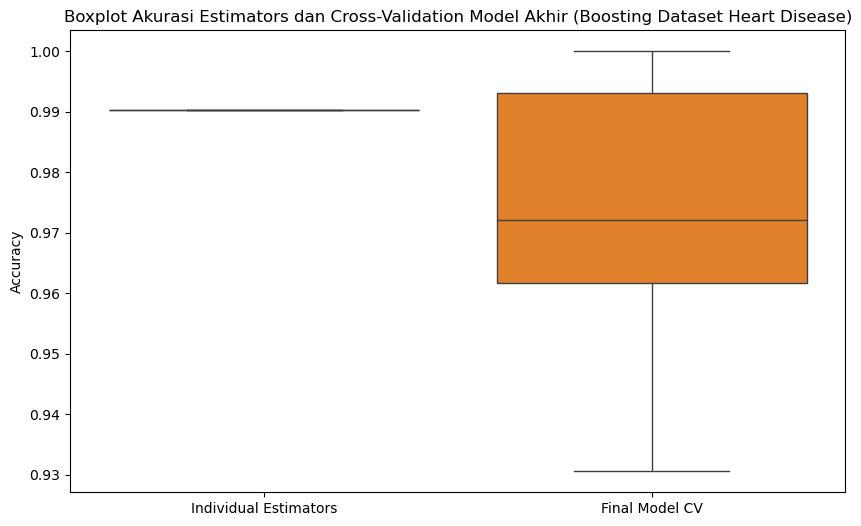

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score
import seaborn as sns

# Memuat dataset penyakit jantung dari file CSV
def load_heart_disease_dataset(filepath):
    data = pd.read_csv(filepath)
    # Misalkan kolom terakhir adalah label (target) dan sisanya adalah fitur
    X = data.iloc[:, :-1].values  # Ambil semua kolom kecuali kolom terakhir sebagai fitur
    y = data.iloc[:, -1].values   # Ambil kolom terakhir sebagai label
    return X, y

# Ganti 'path_to_your_csv' dengan path ke file CSV Anda
filepath = 'heart.csv'
X, y = load_heart_disease_dataset(filepath)

# Memisahkan dataset menjadi data latih dan uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

# Membuat model AdaBoostClassifier dengan DecisionTree sebagai base estimator dan 10 estimators
boosting = AdaBoostClassifier(estimator=DecisionTreeClassifier(), n_estimators=10, random_state=1)

# Melatih model pada data latih
boosting.fit(X_train, y_train)

# Memprediksi data uji
y_pred = boosting.predict(X_test)

# Menghitung akurasi
accuracy = accuracy_score(y_test, y_pred)
print(f"Akurasi model: {accuracy*100:.2f}%")

# Mengambil hasil akurasi dari masing-masing estimator (disimulasikan)
individual_accuracies = []
for estimator in boosting.estimators_:
    y_pred_individual = estimator.predict(X_test)
    individual_accuracy = accuracy_score(y_test, y_pred_individual)
    individual_accuracies.append(individual_accuracy)

# Melakukan cross-validation untuk model akhir (boosting)
cv_scores = cross_val_score(boosting, X_train, y_train, cv=10)

# Menggabungkan akurasi estimator dan cross-validation dalam satu boxplot
plt.figure(figsize=(10, 6))

# Gabungkan data ke dalam satu list untuk membuat boxplot
data = [individual_accuracies, cv_scores]
labels = ['Individual Estimators', 'Final Model CV']

# Membuat boxplot
sns.boxplot(data=data)
plt.title("Boxplot Akurasi Estimators dan Cross-Validation Model Akhir (Boosting Dataset Heart Disease)")
plt.ylabel("Accuracy")
plt.xticks(ticks=[0, 1], labels=labels)

plt.show()
